<a href="https://colab.research.google.com/github/elyasncr/Curso_udemy_Java/blob/main/Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - População e Amostra.
  ### 1.1 População:
  - É o conjunto total e completo de dados.
  - Contém todos os membros de um grupo específico.
  - As medidas que calculamos usando a população são chamadas de parâmetros.
  - Os resultados das análises usando a população refletem a realidade.

  ### 1.2 Amostra:
  - É um subconjunto da população;
  - É uma parte do todo, que é usada para representar a população.
  - As medidas que calculamos usando a amostra são chamadas de **estatísticas.** 
  - Os resultados das análises usando uma amostra **contém uma margem de erro**.
  - É importante que tenhamos boas amostras de uma população. OU pequenas amostras de um todo.

  - Exemplo de população e amostra

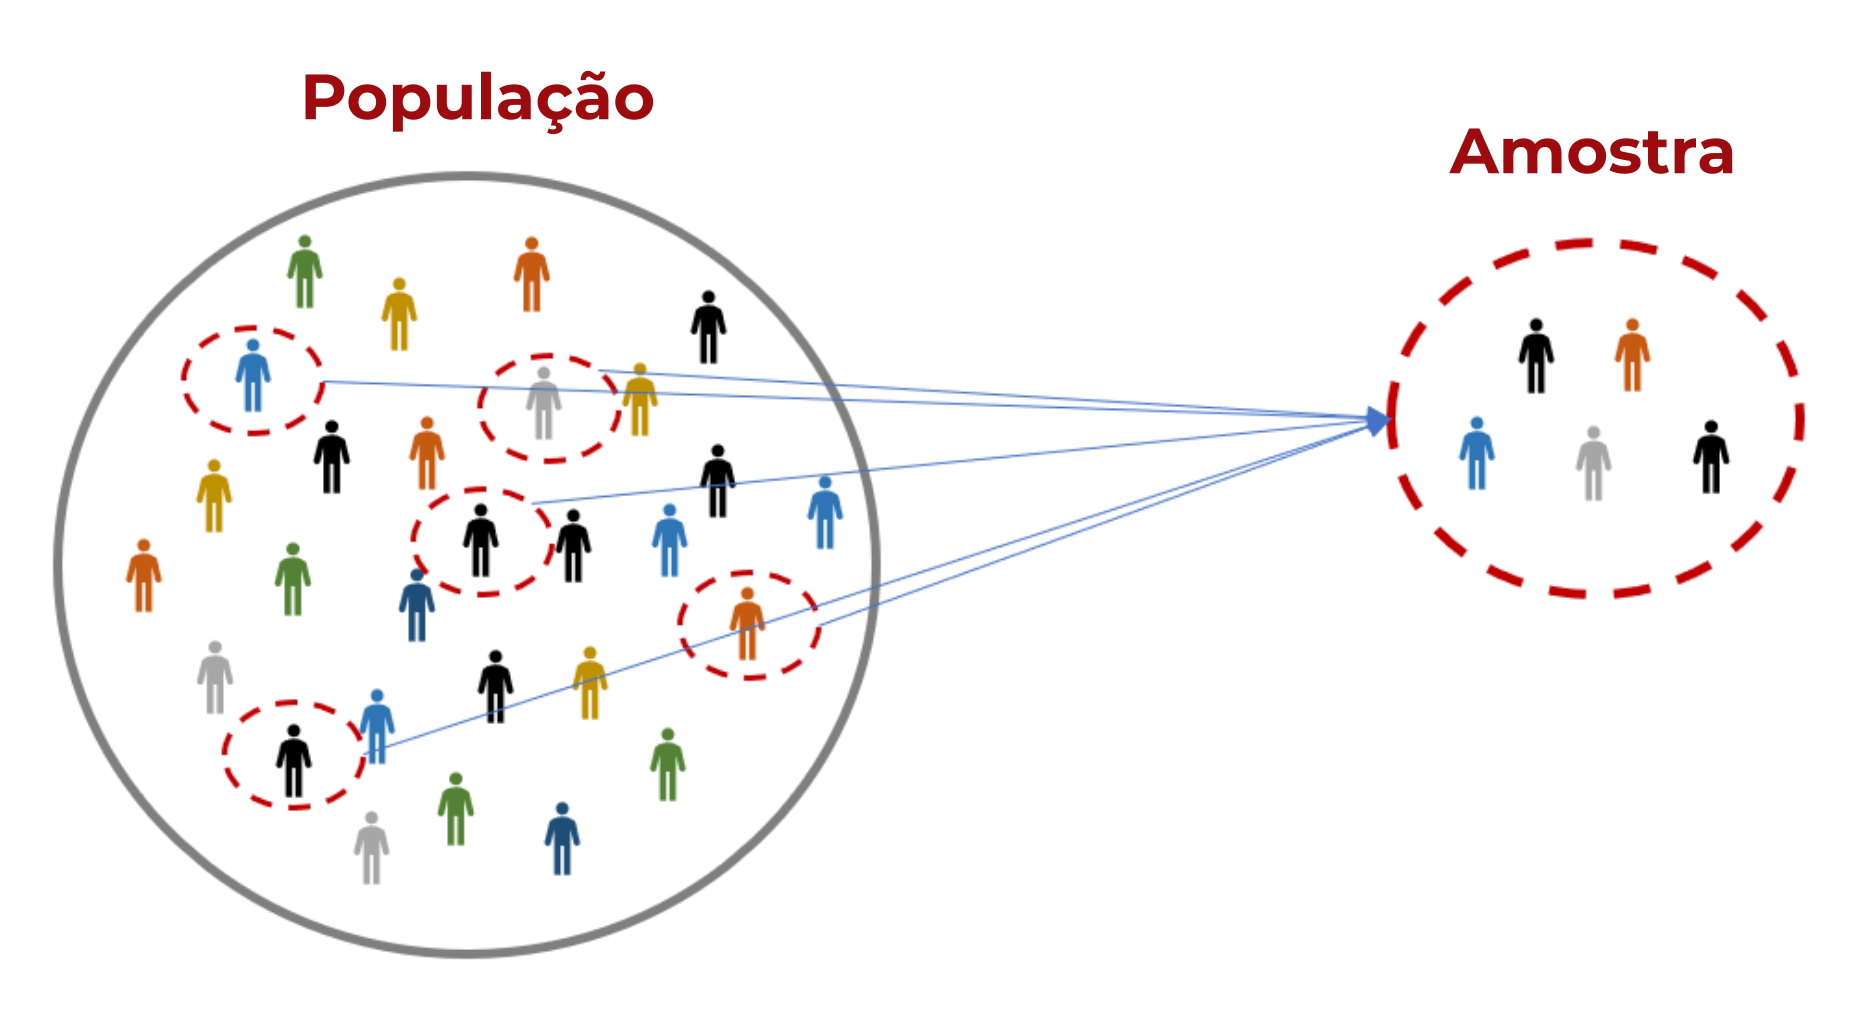


# 2 - Técnicas de amostragem.
- Amostragem é o processo de seleção das observações da população que irão compor uma amostra.
- É de extrema importância que se escolha um bom processo de amostragem porque uma boa amostra leva a resultados confiáveis.
- Dizemos que uma amostra é boa quando ela representa bem a população.

### 2.1 - Temos tipos diferentes de amostragem. As mais utilizadas são:
  - Aleatória simples:
      - **Vantagens:** Evita o erro sistemático e viés de seleção. Tende a ser simples de se planejar e comunicar aos outros.
      - **Desvantagens:** Tende a ter execução complexa e cara. Eventualmente, pode não representar bem subgrupos.
  - Aleatória Sistemática:
      - **Vantagens:** Mais rápida de se impementar do que a amostragem aleatória simples.
      - **Desvantagens:** Eventualmente, pode não representar bem subgrupos populacionais. A ordenação dos participantes pode ser igual a uma ordenação existente, mas desconhecida, na população.
  - Estratificada:
      - **Vantagens:** Evita sub-representação de grupos pouco frequentes.
      - **Desvantagens:** É preciso conhecer os estratos e sua execução é cara e custosa.
  - Por Conglomerados:
      - **Vantagens:** Quando a identificação dos elementos da população é difícil, os conglomerados aparecem como solução. A população já está dividida naturalmente.
      - **Desvantagens:** Os estratos não serem homogêneos entre eles.


# 3 - Amostragem aleatória simples e sistemática.
Essa é a forma mais simples de se amostrar em termos de código. O python tem seu método bult-in para cáculo de amostras aleatórias, assim como a biblioteca pandas, bastante utilizada para análise exploratória de dados.

## 3.1 Amostragem aleatória

Vamos utilizar a função sample do Python para calcular amostrar aleatórias de uma lista, que consideramos como nossa população.

In [1]:
from random import sample

In [2]:
populacao = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Amostra aleatória simples de tamanho 4

In [3]:
sample(populacao, 4)

[1, 2, 10, 4]

In [4]:
sample(populacao, 4)

[5, 8, 7, 11]

In [5]:
sample(populacao, 4)

[8, 9, 10, 12]

In [6]:
sample(populacao, 4)

[8, 5, 11, 2]

In [7]:
sample(populacao, 13)

ValueError: ignored

In [8]:
sample(populacao, 3)

[12, 7, 2]

Tomar cuidado com o tamanho da amostra, pois não pode ser maior que o número da amostra.

Importando biblioteca pandas

In [9]:
import pandas

In [12]:
df = pandas.DataFrame(populacao, columns = ["values"])
df

,values
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


Amostra aleatória simples de tamanho 4

In [13]:
df.sample(n = 4)

,values
5,6
7,8
0,1
1,2


In [14]:
df.sample(n = 4)

,values
0,1
7,8
6,7
5,6


In [15]:
df.sample(n = 4)

,values
0,1
7,8
2,3
3,4


Ao invés de passar o tamanho da amostra que queremos para o pandas, podemos passar a proporção do todo que queremos na nossa amostra.


In [17]:
df.sample(frac = 0.33)

,values
3,4
11,12
0,1
4,5


In [18]:
df.sample(frac = 0.33)

,values
7,8
5,6
11,12
0,1


In [16]:
df.sample(frac = 0.33)

,values
8,9
4,5
11,12
2,3


## 3.2  Amostragem Sistemática

Vamos usar o exemplo acima, onde pegamos a terceira ocorrência, começando da segunda observação.

In [19]:
import numpy as np

Usando python puro, ficaria assim:

In [20]:
tamanho_populacao = len(populacao)

In [21]:
tamanho_populacao

12

In [22]:
for i in range(1, tamanho_populacao, 3):
  print(i)

1
4
7
10


In [26]:
amostra_sistematica_ex = []


for i in range(1, tamanho_populacao, 3):
  print(populacao[i])
  amostra_sistematica_ex.append(populacao[i])

2
5
8
11


In [27]:
amostra_sistematica_ex

[2, 5, 8, 11]

Para calcularmos uma amostra sistemática no pandas, a lógica é a mesma. Vamos utilizar os índices do pandas para filtrar somente as posições que queremos

In [28]:
np.arange(1, 12, step=3)

array([ 1,  4,  7, 10])

In [31]:
df.shape[0]

12

In [29]:
def amostra_sistematica(df, inicio = 0, step = 3):
  indexas = np.arange(inicio, df.shape[0], step = step)
  amostra = df.iloc[indexas]
  return amostra

In [30]:
amostra_sistematica(df, 1, 3)

,values
1,2
4,5
7,8
10,11


# 4 - Amostragem estratificada e por conglomerados.

Nessa amostragem, vamos olhar para cada estrato para retirar amostras para então formar nossa amostra final.

## 4.1 Amostragem estratificada

In [33]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
b = ["A", "A", "A", "A", "B", "B", "C", "C", "C", "D", "D", "D"]

df = pandas.DataFrame({"grupo": b, "values": a})

df

,grupo,values
0,A,1
1,A,2
2,A,3
3,A,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9
9,D,10


Primeiramente, vamos fazer uma amostragem estratificada onde cada estrato vai ter o mesmo tamanho na amostra final, a menos que a quantidade dentro do estrato seja menor do que a que queremos.


In [43]:
def amostra_estratificada_1(df, n, estrato):

  amostra = df.groupby(estrato, group_keys=False).apply(lambda x: x.sample(min(len(x), n)))

  return amostra

Amostra estratificada com estratos de tamanho 2

In [44]:
amostra_estratificada_1(df, 2, 'grupo')

,grupo,values
3,A,4
1,A,2
4,B,5
5,B,6
6,C,7
7,C,8
10,D,11
11,D,12


In [46]:
amostra_estratificada_1(df, 2, 'grupo')

,grupo,values
1,A,2
0,A,1
5,B,6
4,B,5
6,C,7
7,C,8
11,D,12
9,D,10


In [47]:
amostra_estratificada_1(df, 2, 'grupo')

,grupo,values
3,A,4
1,A,2
5,B,6
4,B,5
8,C,9
6,C,7
11,D,12
10,D,11


In [48]:
amostra_estratificada_1(df, 2, 'grupo')

,grupo,values
0,A,1
2,A,3
5,B,6
4,B,5
7,C,8
8,C,9
10,D,11
9,D,10


In [49]:
amostra_estratificada_1(df, 2, 'grupo')

,grupo,values
3,A,4
1,A,2
5,B,6
4,B,5
6,C,7
7,C,8
9,D,10
11,D,12


Amostra estratificada com estratos de tamanho 3

In [45]:
amostra_estratificada_1(df, 3, 'grupo')

,grupo,values
3,A,4
1,A,2
0,A,1
4,B,5
5,B,6
7,C,8
8,C,9
6,C,7
10,D,11
9,D,10


In [ ]:
amostra_estratificada_1(df, 3, 'grupo')

In [ ]:
amostra_estratificada_1(df, 3, 'grupo')

In [ ]:
amostra_estratificada_1(df, 3, 'grupo')

In [ ]:
amostra_estratificada_1(df, 3, 'grupo')

In [ ]:
amostra_estratificada_1(df, 3, 'grupo')

Agora, ao invés de definir o tamanho dos estratos, vamos definir o tamanho da amostra final. Cada estrato vai ter uma amostra proporcional à representação do estrato na população.

In [52]:
def amostra_estratificada_2(df, N, estrato):
  tamanho_pop = df.shape[0]
  amostra = df.groupby(estrato, group_keys=False)\
  .apply(lambda x: x.sample(int(N*len(x)/tamanho_pop)))\
  .sort_values(by=estrato)
  return amostra

Amostra estratificada de tamanho 9

In [53]:
amostra_estratificada_2(df, 6, 'grupo')

,grupo,values
1,A,2
2,A,3
5,B,6
6,C,7
9,D,10


## 4.2 Amostragem por Conglomerado

Aqui, precisaremos primeiro amostrar aleatóriamente os conglomerados para então pegar todas as observações desses conglomerados escolhidos e formar nossa amostra. 

In [ ]:
from random import sample

In [55]:
def amostra_conglomerado(df, n_conglomerados, conglomerado):
  todos_conglomerados = list(df[conglomerado].unique())
  tamanho_conglomerados = len(todos_conglomerados)
  n = min(n_conglomerados, tamanho_conglomerados)
  conglomerados_sorteados = sample(todos_conglomerados, n)

  amostra = df[df[conglomerado].isin(conglomerados_sorteados)]
  return amostra

Amostra por conglomerado com tamanho 2 conglomerados

In [56]:
amostra_conglomerado(df, 2, 'grupo')

,grupo,values
4,B,5
5,B,6
9,D,10
10,D,11
11,D,12


In [57]:
amostra_conglomerado(df, 2, 'grupo')

,grupo,values
4,B,5
5,B,6
9,D,10
10,D,11
11,D,12


In [58]:
amostra_conglomerado(df, 2, 'grupo')

,grupo,values
0,A,1
1,A,2
2,A,3
3,A,4
4,B,5
5,B,6


In [59]:
amostra_conglomerado(df, 2, 'grupo')

,grupo,values
0,A,1
1,A,2
2,A,3
3,A,4
4,B,5
5,B,6


In [ ]:
amostra_conglomerado(df, 2, 'grupo')


amostra por 3 conglomerados

In [60]:
amostra_conglomerado(df, 3, 'grupo')

,grupo,values
0,A,1
1,A,2
2,A,3
3,A,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9
